In [61]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from readsql import queryToDataFrame,showTables,DescribeTable

In [65]:
showTables() 

,Tables_in_swiftmarket
0,categories
1,customers
2,employees
3,salesdata
4,subcategories
5,suppliers


### 1. Provide a visual representation of our annual sales performance over time.

In [113]:
query = """ SELECT MONTHNAME(SaleDate) AS Month,SUM(TotalPrice) AS total_sales
 FROM Salesdata
GROUP BY MONTH(SaleDate),MONTHNAME(SaleDate)
 ORDER BY MONTH(SaleDate),MONTHNAME(SaleDate) """

df = queryToDataFrame(query)
df
 

,Month,total_sales
0,January,155340130.00
1,February,140345189.00
2,March,151612551.00
3,April,150691604.00
4,May,163734120.00
5,June,143529379.00
6,July,149811843.00
7,August,158477094.00
8,September,146743920.00
9,October,143488837.00


In [114]:
months = df['Month'].values
sales_values = df['total_sales']  = df['total_sales'].astype(float).values

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        12 non-null     object 
 1   total_sales  12 non-null     float64
dtypes: float64(1), object(1)
memory usage: 324.0+ bytes


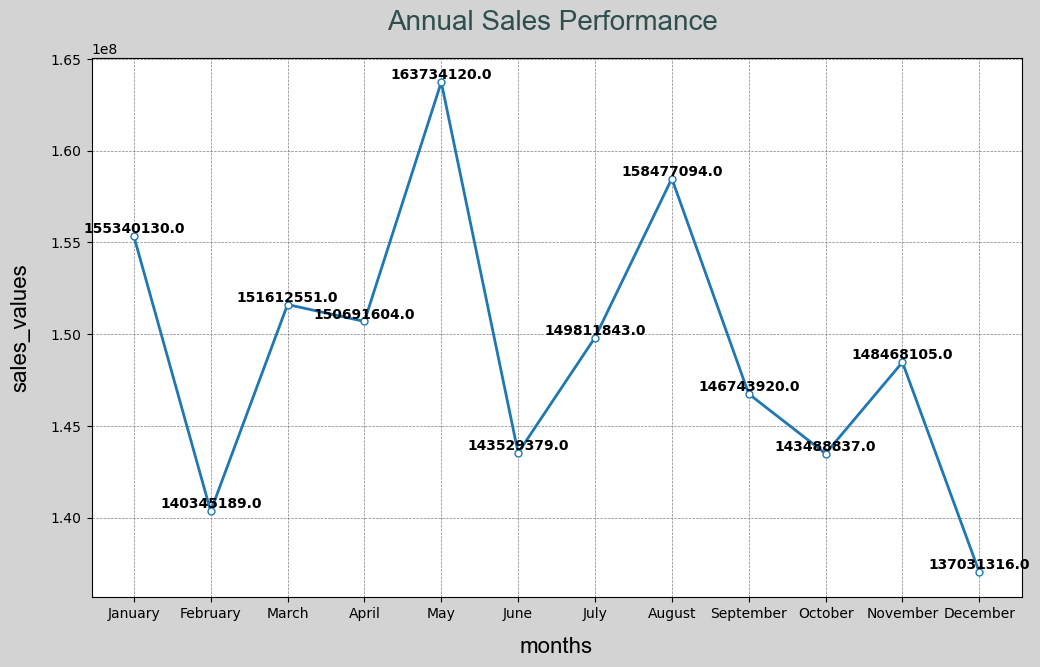

In [119]:
plt.figure(figsize=(12, 7),facecolor='lightgray')
plt.plot(months,sales_values,linestyle='-',linewidth=2, color='#1f77b4', marker='o', markersize=5, markerfacecolor='white')
plt.title('Annual Sales Performance ',fontdict={'family': 'Arial', 'size': 20, 'color': 'darkslategray'}, pad=20)
plt.xlabel("months", fontdict={'family': 'Arial', 'size': 16, 'color': 'black'}, labelpad=12)
plt.ylabel("sales_values",fontdict={'family': 'Arial', 'size': 16, 'color': 'black'}, labelpad=15)

for i in range(len(df['Month'])):
    plt.annotate(xy=(i,df['total_sales'].values[i]),
                 text = df['total_sales'].values[i],
                 horizontalalignment='center',
                 verticalalignment='bottom',
                fontsize=10,fontweight='bold',color='black')
    

plt.grid(linestyle = '--',color='Grey',linewidth =0.5)
plt.show()

### 2. The client is interested in understanding how the sales have been fluctuating over time to identify any underlying patterns or anomalies Analyze the trend in our monthly sales using a moving average technique.

In [121]:


query = """SELECT
    months,
    AVG(monthlysales) OVER (ORDER BY monthnum ROWS BETWEEN 3 PRECEDING AND CURRENT ROW) AS MovingAverage
FROM
    (
        SELECT
            MONTH(saledate) AS monthnum,
            MONTHNAME(SaleDate) AS months,
            SUM(totalprice) AS monthlysales
        FROM
            Salesdata
        GROUP BY
            MONTH(saledate), MONTHNAME(saledate)) t;"""


df = queryToDataFrame(query)
df


,months,MovingAverage
0,January,155340130.000000
1,February,147842659.500000
2,March,149099290.000000
3,April,149497368.500000
4,May,151595866.000000
5,June,152391913.500000
6,July,151941736.500000
7,August,153888109.000000
8,September,149640559.000000
9,October,149630423.500000


In [122]:
months = df['months'].values
Moving_Average = df['MovingAverage'] = df['MovingAverage'].astype(float).values

In [123]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   months         12 non-null     object 
 1   MovingAverage  12 non-null     float64
dtypes: float64(1), object(1)
memory usage: 324.0+ bytes


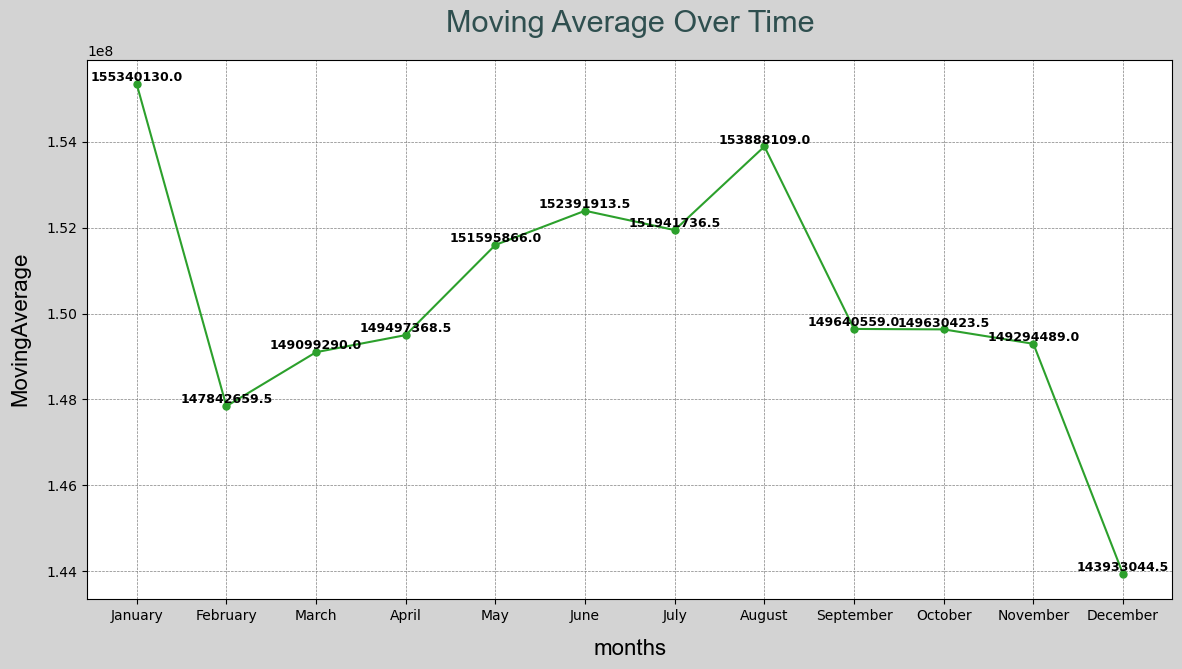

In [128]:
plt.figure(figsize=(14,7),facecolor='lightgray')

plt.title('Moving Average Over Time',fontdict={'family': 'Arial', 'size': 22, 'color': 'darkslategray'}, pad=20)
plt.plot(months,Moving_Average,marker='o', markersize=5, color='#2ca02c', linewidth=1.5)
plt.xlabel('months',fontdict={'family': 'Arial', 'size': 16, 'color': 'black'}, labelpad=12)
plt.ylabel('MovingAverage',fontdict={'family': 'Arial', 'size': 16, 'color': 'black'}, labelpad=12)

for i in range(len(df['months'])):
    plt.annotate(xy=(i, df['MovingAverage'].values[i]), 
                 text=df['MovingAverage'].values[i], 
                 horizontalalignment='center',
                 verticalalignment='bottom',
                 fontsize=9,fontweight='bold')

plt.grid(linestyle = '--',color='Grey',linewidth =0.5)
plt.show()


### 3. Explore the month-over-month growth rate in sales.

In [11]:

query = """
SELECT
    months,
    100 * (monthlysales - LAG(monthlysales) OVER (ORDER BY monthnum)) /
    LAG(monthlysales) OVER (ORDER BY monthnum) AS 'growthrate in %'
FROM
    (
        SELECT
            MONTH(saledate) AS monthnum,
            MONTHNAME(SaleDate) AS months,
            SUM(totalprice) AS monthlysales
        FROM
            Salesdata
        GROUP BY
            MONTH(saledate),
            MONTHNAME(saledate)
    ) t
ORDER BY
    monthnum,
    months;
"""


df = queryToDataFrame(query)
df

,months,growthrate in %
0,January,None
1,February,-9.652973
2,March,8.028321
3,April,-0.607435
4,May,8.655105
5,June,-12.339970
6,July,4.377128
7,August,5.784089
8,September,-7.403703
9,October,-2.218206


In [12]:
Months = df['months'].values
growthrate=df['growthrate in %']= df['growthrate in %'].astype('float').values

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   months           12 non-null     object 
 1   growthrate in %  11 non-null     float64
dtypes: float64(1), object(1)
memory usage: 324.0+ bytes


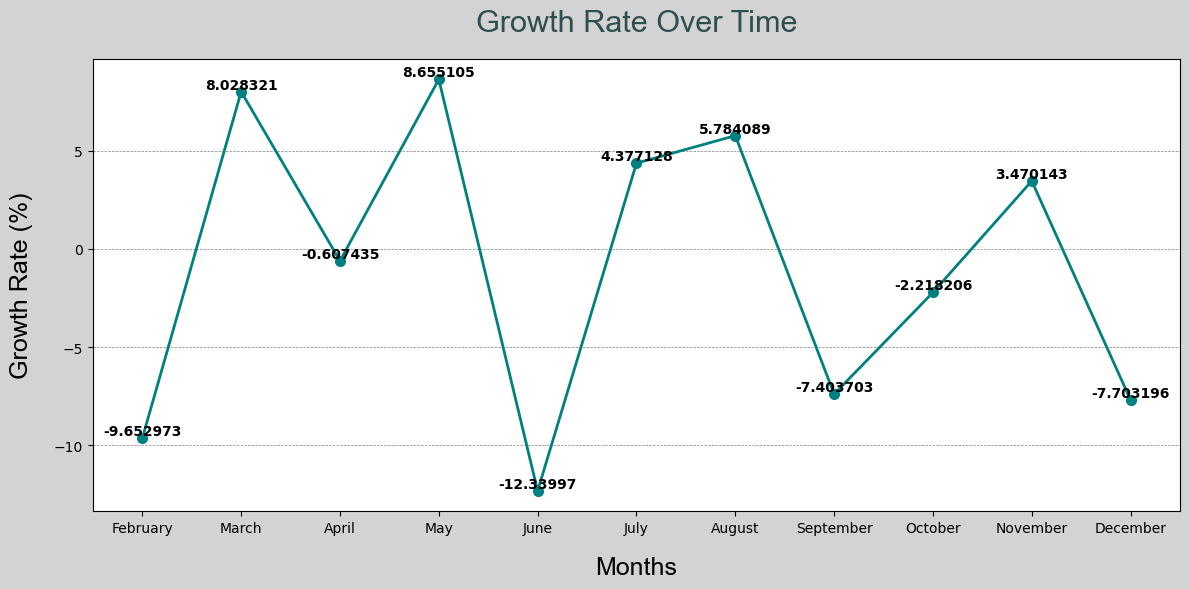

In [144]:
plt.figure(figsize=(12, 6),facecolor='lightgray')
plt.title('Growth Rate Over Time',fontdict={'family': 'Arial', 'size': 22, 'color': 'darkslategray'}, pad=20)
plt.plot(Months, growthrate,marker='o', markersize=7, color='teal', linewidth=2)
plt.xlabel('Months',fontdict={'family': 'Arial', 'size': 18, 'color': 'black'}, labelpad=15)
plt.ylabel('Growth Rate (%)',fontdict={'family': 'Arial', 'size': 18, 'color': 'black'}, labelpad=15)

for i in range(len(Months)):
    plt.annotate(xy=(Months[i], growthrate[i]),
                 text=growthrate[i],
                 horizontalalignment='center',
                 verticalalignment='bottom',
                 fontsize=10,fontweight='bold')


plt.grid(axis='y',linestyle='--',color='Grey',linewidth=0.5)
plt.tight_layout()
plt.show()


### 4. identify the top-performing sales representatives based on their total sales volume

In [211]:
query = """
SELECT
    t.employeeid,
    e.firstname,
    t.totalsales
FROM
    (
        SELECT
            employeeid,
            SUM(totalprice) AS totalsales
        FROM
            salesdata
        GROUP BY
            employeeid
    ) t
JOIN
    employees e
    ON t.employeeid = e.EmployeeID
ORDER BY
    t.totalsales DESC
LIMIT 10;
"""


df = queryToDataFrame(query)
df

,employeeid,firstname,totalsales
0,1115,Yuvaan,20895341.00
1,1017,Tiya,19035834.00
2,1029,Shaan,18649467.00
3,1074,Stuvan,18333919.00
4,1001,Fateh,18231579.00
5,1113,Mannat,18104646.00
6,1059,Piya,18054949.00
7,1053,Kiaan,18049630.00
8,1002,Chirag,18042772.00
9,1097,Abram,17873130.00


In [212]:
employees = df ['firstname'].values
Totalsales = df ['totalsales']= df['totalsales'].astype(float).values

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   employeeid  10 non-null     int64  
 1   firstname   10 non-null     object 
 2   totalsales  10 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.0+ bytes


In [214]:
cmap_val = np.linspace(0.2,0.4,10)
cmap = plt.cm.twilight(cmap_val)

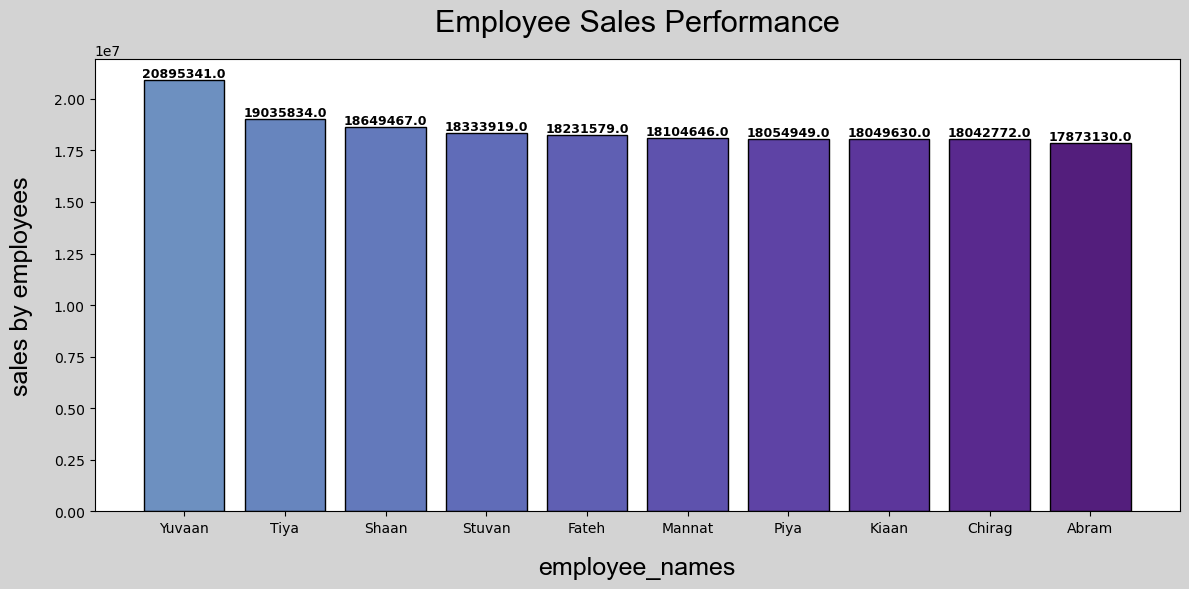

In [217]:
plt.figure(figsize=(12,6),facecolor='lightgray')
plt.bar(employees,Totalsales,color=cmap,edgecolor='black')

plt.title('Employee Sales Performance', fontdict={'family': 'Arial', 'size': 22, 'color': 'black'}, pad=20)
plt.xlabel('employee_names', fontdict={'family': 'Arial', 'size': 18, 'color': 'black'}, labelpad=15)
plt.ylabel('sales by employees',fontdict={'family': 'Arial', 'size': 18, 'color': 'black'}, labelpad=15)

for i in range(len(Totalsales)):
    plt.annotate(xy=(employees[i], Totalsales[i]),
                 text=str(Totalsales[i]),
                 horizontalalignment='center',
                  verticalalignment='bottom',
                 fontsize=9,fontweight='bold')


plt.tight_layout()
plt.show()

In [ ]:
4756=]=\78=]]\


### 5. what are the total sales made by each employee?

In [178]:
query = """
SELECT
    firstname,
    SUM(totalprice) AS total
FROM
    employees e
JOIN
    salesdata s
    ON e.employeeid = s.employeeid
GROUP BY
    firstname
ORDER BY
    total DESC
LIMIT 10;
"""

df = queryToDataFrame(query)
df

,firstname,total
0,Myra,47487729.00
1,Yasmin,44981524.00
2,Renee,43687580.00
3,Nitara,41359384.00
4,Kiaan,34380912.00
5,Yuvaan,33898153.00
6,Tiya,33265639.00
7,Chirag,33019735.00
8,Fateh,32021064.00
9,Shray,31798352.00


In [179]:
employees = df['firstname'].values
Totalsales = df['total'] = df['total'].astype('float').values

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   firstname  10 non-null     object 
 1   total      10 non-null     float64
dtypes: float64(1), object(1)
memory usage: 292.0+ bytes


In [218]:
cmap_val = np.linspace(0.2,1,10)
cmap = plt.cm.binary(cmap_val)

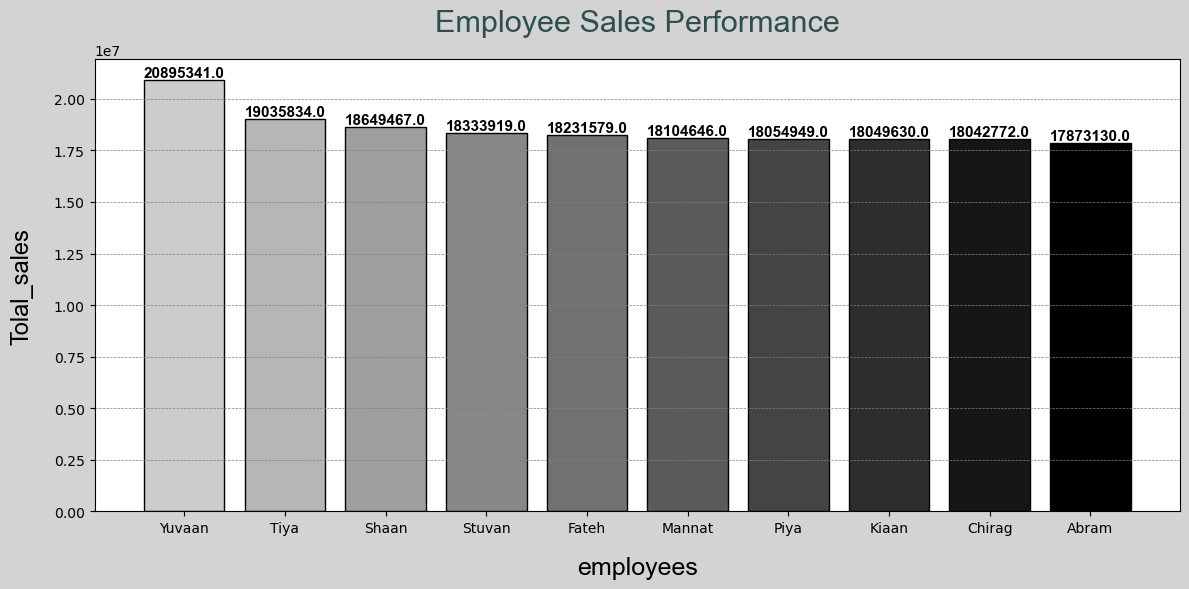

In [219]:
plt.figure(figsize=(12, 6),facecolor='lightgray')
plt.bar(employees,Totalsales ,color=cmap,edgecolor='black')
plt.title('Employee Sales Performance',fontdict={'family': 'Arial', 'size': 22, 'color': 'darkslategray'}, pad=20)

plt.xlabel('employees', fontdict={'family': 'Arial', 'size': 18, 'color': 'black'}, labelpad=15) 
plt.ylabel('Tolal_sales',fontdict={'family':'Arial','size':17,'color':'black'},labelpad=15)
 
for i in range (len(Totalsales)):
     plt.annotate(xy=(employees[i],Totalsales[i]),
                  text=Totalsales[i],
                  horizontalalignment='center',
                  verticalalignment='bottom',
                  family='Arial',fontsize=11,
                fontweight='bold')

plt.grid(axis='y',linestyle='--',color='Grey',linewidth=0.5)
plt.tight_layout()
plt.show()

### 6. Which category has the highest total sales ?

In [311]:
query = """
SELECT
    c.CategoryName,
    SUM(s.TotalPrice) AS TotalSales
FROM
    Salesdata s
JOIN
    Subcategories sc ON s.SubcatID = sc.SubcatID
JOIN
    Categories c ON sc.CategoryID = c.CategoryID
GROUP BY
    c.CategoryName
ORDER BY
    TotalSales DESC
    limit 5;
"""


df = queryToDataFrame(query)
df

,CategoryName,TotalSales
0,Pet Supplies and Accessories,361848986.00
1,Health and Wellness Products,324761329.00
2,Electronics and Gadgets,319374417.00
3,Books and Educational Materials,282897933.00
4,Home and Kitchen Appliances,269316684.00


In [312]:
Category = df['CategoryName'].values
Total_sales = df['TotalSales'] = df['TotalSales'].astype('float').values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CategoryName  5 non-null      object 
 1   TotalSales    5 non-null      float64
dtypes: float64(1), object(1)
memory usage: 212.0+ bytes


In [317]:
cmap_val = np.linspace(0.3,0.7,3)
cmap = plt.cm.viridis(cmap_val)

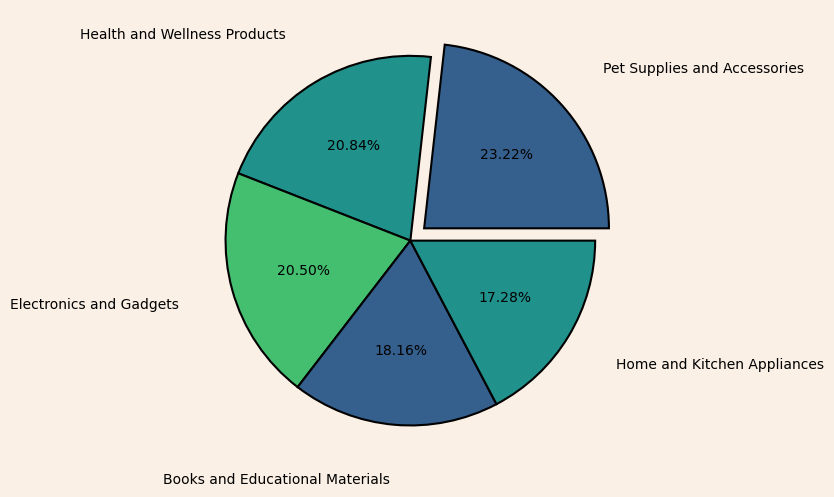

In [318]:
plt.figure(figsize=(12, 6),facecolor='linen')
plt.pie(x=Total_sales,
    labels=Category,autopct='%.2f%%',
    explode=(0.1, 0, 0, 0, 0),labeldistance=1.3,
    colors=cmap, wedgeprops={'edgecolor':'black', 'linewidth':1.5}) 
   
plt.show()

### 7. How many customers are there in each state?

In [29]:
query = """
SELECT
    State,
    COUNT(*) AS TotalCustomers
FROM
    Customers
GROUP BY
    State
ORDER BY
    TotalCustomers DESC
LIMIT 10;
"""


df = queryToDataFrame(query)
df

,State,TotalCustomers
0,Manipur,14
1,Bihar,14
2,Goa,14
3,Nagaland,11
4,Arunachal Pradesh,11
5,Himachal Pradesh,11
6,Karnataka,11
7,Assam,10
8,Tripura,10
9,Gujarat,10


In [30]:
states = df['State'].values
No_of_customers = df['TotalCustomers'].values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State           10 non-null     object
 1   TotalCustomers  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 292.0+ bytes


In [223]:
cmap_val = np.linspace(0.2,0.5,10)
cmap = plt.cm.viridis(cmap_val)

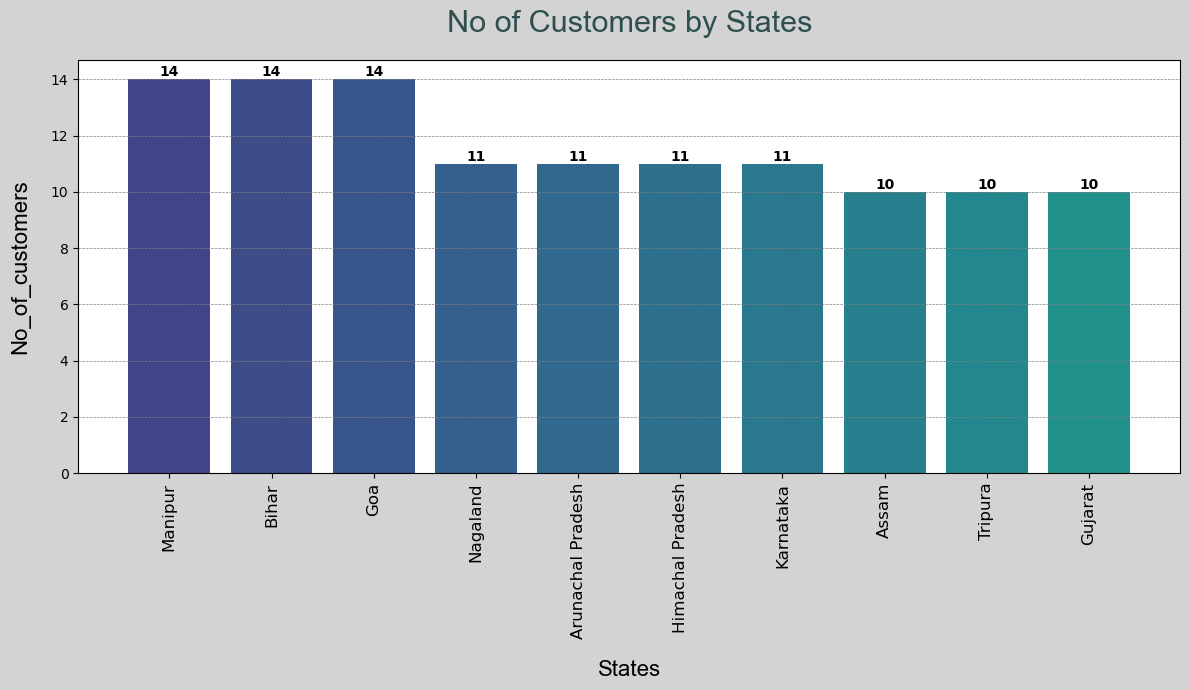

In [227]:
plt.figure(figsize=(12, 7),facecolor='lightgray')
plt.title("No of Customers by States",fontdict={'family': 'Arial', 'size': 22, 'color': 'darkslategray'}, pad=20)
plt.bar(states,No_of_customers, color=cmap)

plt.xlabel('States',fontdict={'family': 'Arial', 'size': 16, 'color': 'black'}, labelpad=15)
plt.ylabel('No_of_customers',fontdict={'family': 'Arial', 'size': 16, 'color': 'black'}, labelpad=15)

for i in range(len(states)):
        plt.annotate(xy=(i, No_of_customers[i]),
                text=str(No_of_customers[i]),
                horizontalalignment='center',
                verticalalignment='bottom',
                fontsize=10,fontweight='bold')

plt.xticks(rotation=90,fontsize=12)
plt.grid(axis='y',linestyle='--',color='Grey',linewidth=0.5)
plt.tight_layout()
plt.show()

### 8. What is the average quantity of top product sold ? 

In [33]:
query = """
SELECT 
    s.SubcatID,
    sb.SubcatName,
    AVG(Quantity) AS AvgQuantitySold
FROM 
    Salesdata s
JOIN 
    subcategories sb ON s.subcatid = sb.SubcatID
GROUP BY 
    s.SubcatID, sb.subcatname
ORDER BY 
    AvgQuantitySold DESC
LIMIT 10;
"""


df = queryToDataFrame(query)
df

,SubcatID,SubcatName,AvgQuantitySold
0,6017,Resistance bands,3.1587
1,6024,Workbooks,3.1496
2,6011,Camping tent,3.1071
3,6019,Foam roller,3.0980
4,6005,Portable power banks,3.0974
5,6002,Laptops,3.0821
6,6014,Bicycle,3.0703
7,6026,Dog/cat food,3.0673
8,6021,Fiction novels,3.0637
9,6028,Pet beds,3.0504


In [34]:
Categories = df['SubcatName'].values
quantity = df['AvgQuantitySold'] = df['AvgQuantitySold'].astype('float').values

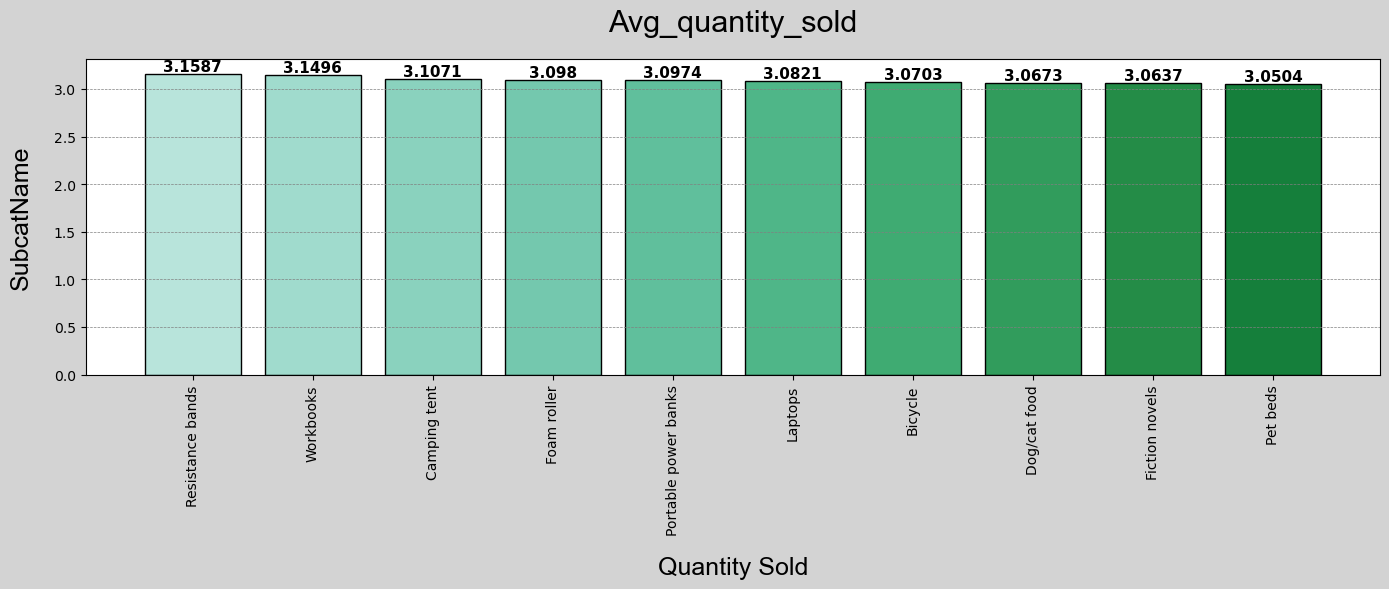

In [279]:
plt.figure(figsize=(14, 6),facecolor='lightgray')
plt.bar(Categories,quantity ,color=cmap,edgecolor='black')
plt.title('Avg_quantity_sold',fontdict={'family': 'Arial', 'size': 22, 'color': 'black'}, pad=20)
plt.xlabel('Quantity Sold', fontdict={'family': 'Arial', 'size': 18, 'color': 'black'}, labelpad=15)
plt.ylabel('SubcatName',fontdict={'family': 'Arial', 'size': 18, 'color': 'black'}, labelpad=15)

for i in range(len(Categories)):
        plt.annotate(xy=(i, quantity[i]),
                text=str(quantity[i]),
                horizontalalignment='center',
                verticalalignment='bottom',
                fontsize=11,fontweight='bold')



plt.xticks(rotation=90)
plt.grid(axis='y',linestyle='--',color='Grey',linewidth=0.5)
plt.tight_layout()
plt.show()

### 9. Which supplier has the highest total sales?

In [234]:
query = """ 
SELECT 
    SupplierName,
    SUM(TotalPrice) AS TotalSales
FROM 
    Salesdata s
JOIN 
    Subcategories sc ON s.SubcatID = sc.SubcatID
JOIN 
    Suppliers su ON sc.SupplierID = su.SupplierID
GROUP BY 
    SupplierName
ORDER BY 
    TotalSales DESC
LIMIT 10;
"""


df = queryToDataFrame(query)
df

,SupplierName,TotalSales
0,Dora-Aggarwal,180265340.00
1,Agate-Kalita,141629408.00
2,"Sridhar, Sidhu and Maharaj",124268051.00
3,"Sahota, Khurana and Kumar",119604888.00
4,Date-Mander,117152046.00
5,Verma-Vig,112563616.00
6,"Kapur, Acharya and Wadhwa",98842528.00
7,"Sastry, Bali and Deshmukh",86990482.00
8,Mall Group,82034102.00
9,"Khare, Boase and Gole",80254640.00


In [235]:
Suppliername = df['SupplierName'].values
Totalprice = df['TotalSales'] = df['TotalSales'].astype(float).values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SupplierName  10 non-null     object 
 1   TotalSales    10 non-null     float64
dtypes: float64(1), object(1)
memory usage: 292.0+ bytes


In [281]:
cmap_val = np.linspace(0.2,0.4,10)
cmap = plt.cm.seismic(cmap_val)

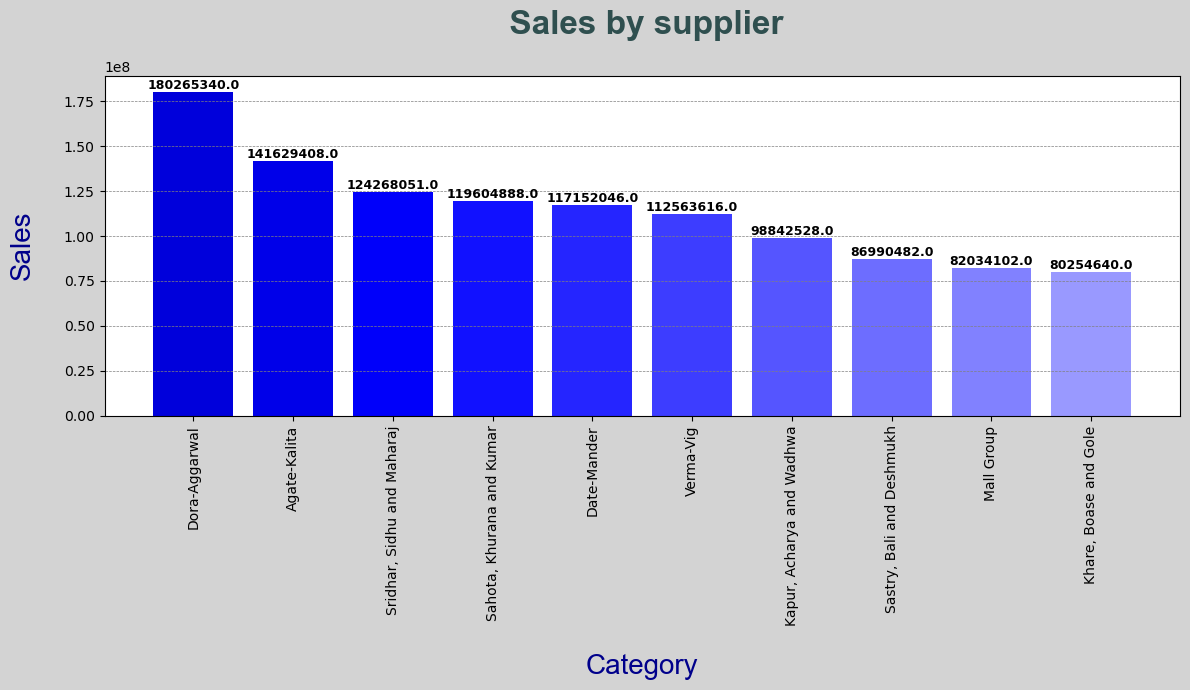

In [282]:
plt.figure(figsize=(12,7),facecolor='lightgray')
plt.title(' Sales by supplier',fontdict={'family': 'Arial', 'size': 24, 'weight': 'bold', 'color': 'darkslategray'}, pad=30)
plt.bar(Suppliername, Totalprice, color=cmap)

plt.xlabel('Category', fontdict={'family': 'Arial', 'size': 20, 'color': 'darkblue'}, labelpad=20)
plt.ylabel('Sales',fontdict={'family': 'Arial', 'size': 20, 'color': 'darkblue'}, labelpad=20)

for i in range(len(Suppliername)):
    plt.annotate(xy=(i, Totalprice[i]),
                 text=str(Totalprice[i]),
                 horizontalalignment='center',
                verticalalignment='bottom',
                fontsize=9,fontweight='bold')
    
plt.xticks(rotation=90)
plt.grid(axis='y',linestyle='--',color='Grey',linewidth=0.5)
plt.tight_layout()
plt.show()


### 10. What is the total revenue generated from sales in each state?

In [40]:
query = """
SELECT 
    c.State,
    SUM(s.TotalPrice) AS TotalRevenue
FROM 
    Salesdata s
JOIN 
    Customers c ON s.CustomerID = c.CustomerID
GROUP BY 
    c.State
LIMIT 10;
"""


df = queryToDataFrame(query)
df

,State,TotalRevenue
0,Assam,91371978.00
1,Tripura,92329290.00
2,Nagaland,91511008.00
3,Manipur,122908203.00
4,Kerala,84668321.00
5,Delhi,53744487.00
6,Mizoram,76073281.00
7,Haryana,51660214.00
8,Chhattisgarh,91546717.00
9,Himachal Pradesh,102905140.00


In [41]:
State = df['State'].values
Total_Revenue = df['TotalRevenue'] = df['TotalRevenue'].astype(float).values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         10 non-null     object 
 1   TotalRevenue  10 non-null     float64
dtypes: float64(1), object(1)
memory usage: 292.0+ bytes


In [250]:
cmap_val = np.linspace(0.2,0.5,10)
cmap = plt.cm.viridis(cmap_val)

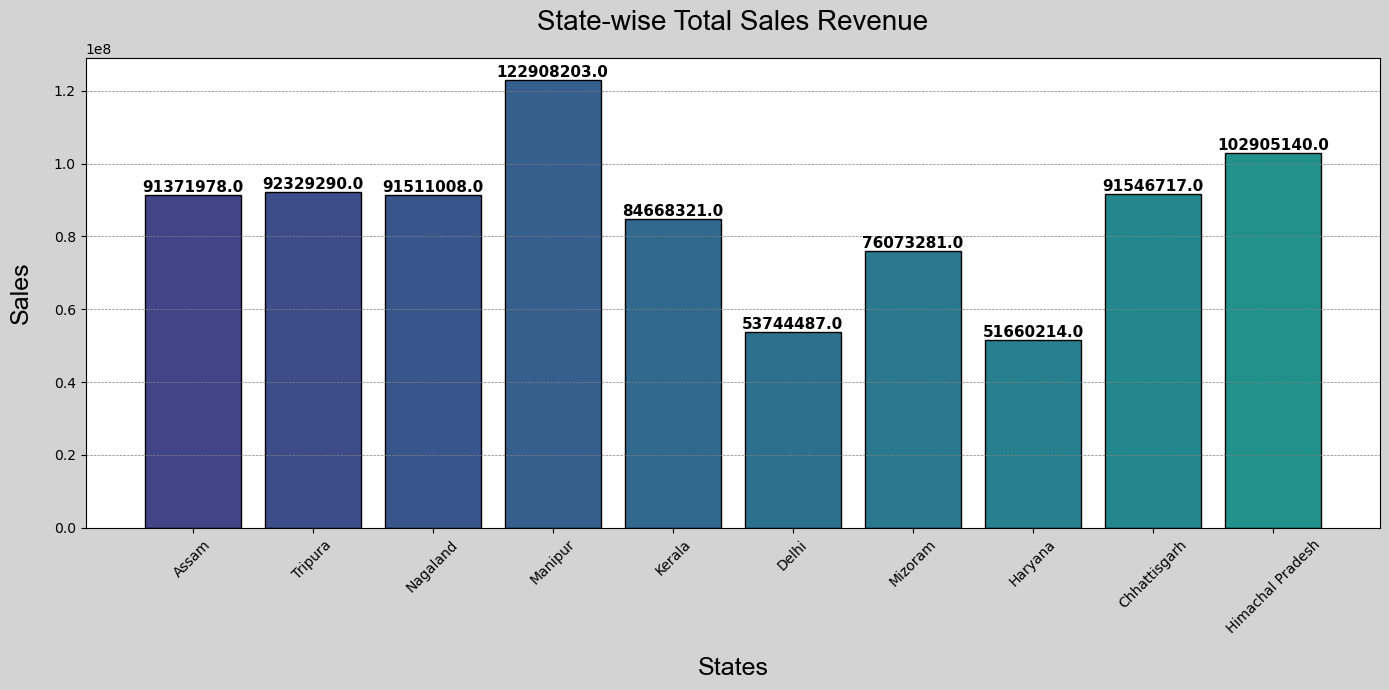

In [253]:
plt.figure(figsize=(14, 7),facecolor='lightgray')
plt.title('State-wise Total Sales Revenue', fontdict={'family':'Arial','size':20,'color':'black'},pad=20)
plt.bar(State, Total_Revenue, color=cmap,edgecolor='black')

plt.xlabel('States',fontdict={'family': 'Arial', 'size': 18, 'color': 'black'}, labelpad=15)
plt.ylabel('Sales',fontdict={'family': 'Arial', 'size': 18, 'color': 'black'}, labelpad=15)

for i in range(len(State)):
    plt.annotate(xy=(i, Total_Revenue[i]),
                 text=str(Total_Revenue[i]),
                 horizontalalignment='center',
                verticalalignment='bottom',
                fontsize=11,fontweight='bold')

plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='--',color='Grey',linewidth=0.5)
plt.tight_layout()
plt.show()

### 11. How many sales were made by each customer. ?

In [283]:
query = """
SELECT 
    s.CustomerID,
    c.firstname,
    COUNT(*) AS TotalSales
FROM 
    Salesdata s
JOIN 
    customers c ON s.CustomerID = c.CustomerID
GROUP BY 
    s.CustomerID, c.firstname
ORDER BY 
    TotalSales DESC
LIMIT 10;
"""


df = queryToDataFrame(query)
df

,CustomerID,firstname,TotalSales
0,C-2023-100-13,Veer,85
1,C-2023-100-130,Amira,81
2,C-2023-100-197,Yuvraj,81
3,C-2023-100-88,Dhruv,78
4,C-2023-100-57,Riya,77
5,C-2023-100-36,Romil,75
6,C-2023-100-75,Prerak,75
7,C-2023-100-101,Shray,74
8,C-2023-100-14,Tiya,73
9,C-2023-100-42,Divyansh,73


In [285]:
Customer_Names = df['firstname'].values
Total_sales = df['TotalSales'] = df['TotalSales'].astype(float).values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  10 non-null     object 
 1   firstname   10 non-null     object 
 2   TotalSales  10 non-null     float64
dtypes: float64(1), object(2)
memory usage: 372.0+ bytes


In [286]:
cmap_val = np.linspace(0.4,0.8,10)
cmap = plt.cm.YlGn(cmap_val)

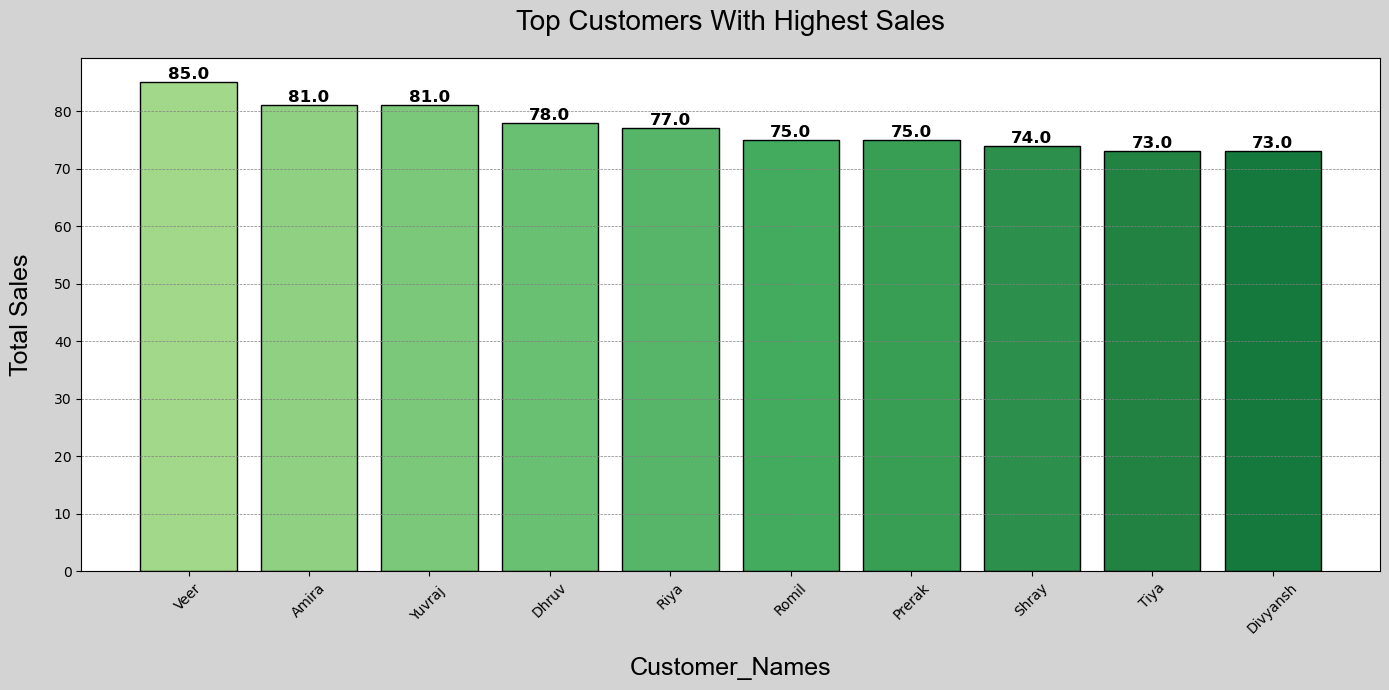

In [287]:
plt.figure(figsize=(14, 7),facecolor='lightgray')
plt.title('Top Customers With Highest Sales', fontdict={'family':'Arial','size':20,'color':'black'},pad=20)
plt.bar(Customer_Names, Total_sales, color=cmap,edgecolor='black')

plt.xlabel('Customer_Names', fontdict={'family': 'Arial', 'size': 18, 'color': 'black'}, labelpad=15)
plt.ylabel('Total Sales', fontdict={'family': 'Arial', 'size': 18, 'color': 'black'}, labelpad=15)

for i in range(len(Customer_Names)):
    plt.annotate(xy=(i, Total_sales[i]),
                 text=str(Total_sales[i]),
                 horizontalalignment='center',
                verticalalignment='bottom',
                fontsize=12,fontweight='bold')

plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='--',color='Grey',linewidth=0.5)
plt.tight_layout()
plt.show()


### 12. What is the total salary expenditure on employees in each department?

In [48]:
query = """
SELECT 
    Department,
    SUM(Salary) AS TotalSalaryExpenditure
FROM 
    Employees
GROUP BY 
    Department;
"""


df = queryToDataFrame(query)
df

,Department,TotalSalaryExpenditure
0,Marketing,469413.37
1,Legal,577095.43
2,Accounts,445848.85
3,Logistics,365835.92
4,Sales,325662.92
5,ML Engineer,652081.28
6,HR Admin,482618.09
7,Engineering,393266.08
8,Analyst,732044.77
9,IT,351627.51


In [49]:
Departments = df['Department'].values
Expenditure = df['TotalSalaryExpenditure'] = df['TotalSalaryExpenditure'].astype(float).values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Department              10 non-null     object 
 1   TotalSalaryExpenditure  10 non-null     float64
dtypes: float64(1), object(1)
memory usage: 292.0+ bytes


In [267]:
cmap_val = np.linspace(0.3,0.8,10)
cmap = plt.cm.BuGn(cmap_val)

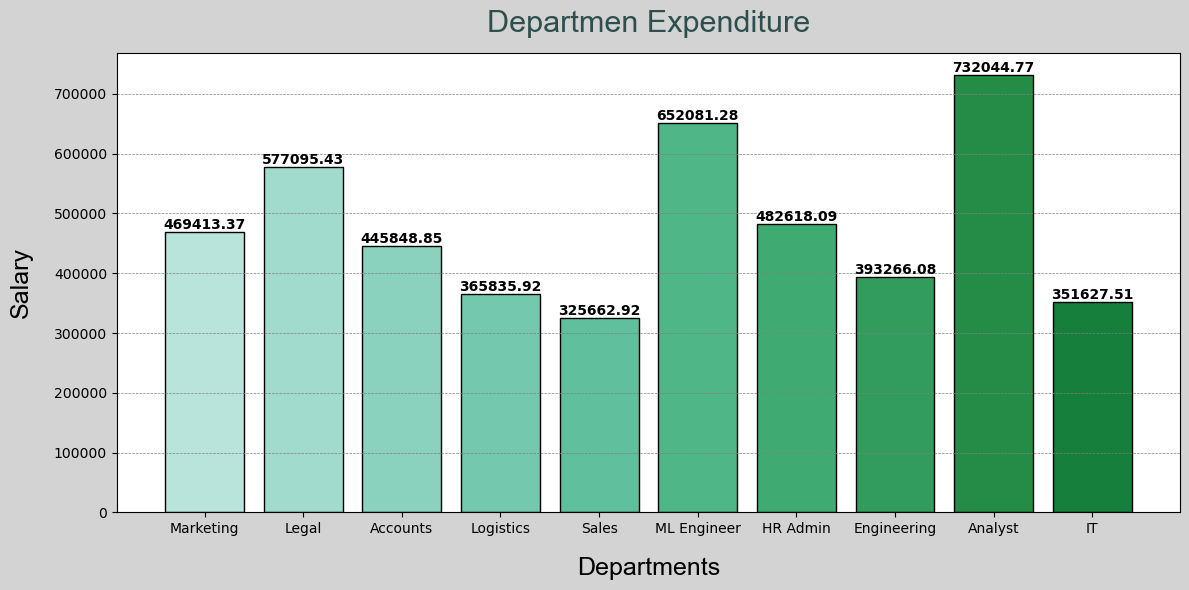

In [268]:
plt.figure(figsize=(12, 6),facecolor='lightgray')
plt.title('Departmen Expenditure', fontdict={'family': 'Arial', 'size': 22, 'color': 'darkslategray'}, pad=15)
plt.bar(Departments, Expenditure, color=cmap,edgecolor='black')

plt.xlabel('Departments', fontdict={'family': 'Arial', 'size': 18, 'color': 'black'}, labelpad=15)
plt.ylabel('Salary',fontdict={'family': 'Arial', 'size': 18, 'color': 'black'}, labelpad=15)

for i in range(len(Departments)):
    plt.annotate(xy=(i, Expenditure[i]),
                 text=str(Expenditure[i]),
                 horizontalalignment='center',
                verticalalignment='bottom',
                fontsize=10,fontweight='bold')

plt.grid(axis='y',linestyle='--',color='Grey',linewidth=0.5)
plt.tight_layout()
plt.show()


### 13.Which subcategory has the highest sellinge price ?

In [52]:
query = """
SELECT 
    SubcatName,
    AVG(UnitPrice) AS AvgSellingPrice
FROM 
    Subcategories
GROUP BY 
    SubcatName
ORDER BY 
    AvgSellingPrice DESC
LIMIT 5;
"""

df = queryToDataFrame(query)
df

,SubcatName,AvgSellingPrice
0,Pet beds,94029.000000
1,Laptops,88216.000000
2,Air fryer,85039.000000
3,Fiction novels,79862.000000
4,Camping stove,79387.000000


In [53]:
subcategory = df['SubcatName'].values
selling_price = df['AvgSellingPrice'] = df['AvgSellingPrice'].astype('float').values

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SubcatName       5 non-null      object 
 1   AvgSellingPrice  5 non-null      float64
dtypes: float64(1), object(1)
memory usage: 212.0+ bytes


In [319]:
cmap_val = np.linspace(0.3,1,3)
cmap = plt.cm.BuPu(cmap_val)

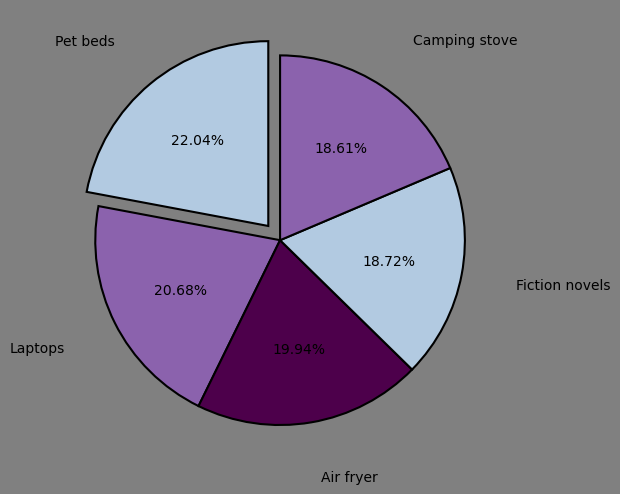

In [320]:
plt.figure(figsize=(12, 6),facecolor='grey')
plt.pie(x=selling_price, labels=subcategory, autopct='%.2f%%',
        explode=(0.1,0,0,0,0),
        labeldistance=1.3,
        colors=cmap,
        wedgeprops={'edgecolor':'black', 'linewidth':1.5},
        startangle=90)

plt.show()

### 14. What is the total revenue generated from sales in each category

In [322]:
query = """
SELECT 
    c.CategoryName,
    SUM(s.TotalPrice) AS TotalRevenue
FROM 
    Salesdata s
JOIN 
    Subcategories sc ON s.SubcatID = sc.SubcatID
JOIN 
    Categories c ON sc.CategoryID = c.CategoryID
GROUP BY 
    c.CategoryName;
"""


df = queryToDataFrame(query)
df

,CategoryName,TotalRevenue
0,Electronics and Gadgets,319374417.00
1,Home and Kitchen Appliances,269316684.00
2,Outdoor and Sports Equipment,231074739.00
3,Health and Wellness Products,324761329.00
4,Books and Educational Materials,282897933.00
5,Pet Supplies and Accessories,361848986.00


In [323]:
Categoryname = df['CategoryName'].values
Totalsales = df['TotalRevenue'] = df['TotalRevenue'].astype(float).values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CategoryName  6 non-null      object 
 1   TotalRevenue  6 non-null      float64
dtypes: float64(1), object(1)
memory usage: 228.0+ bytes


In [332]:
cmap_val = np.linspace(0.2,0.5,6)
cmap = plt.cm.viridis_r(cmap_val)

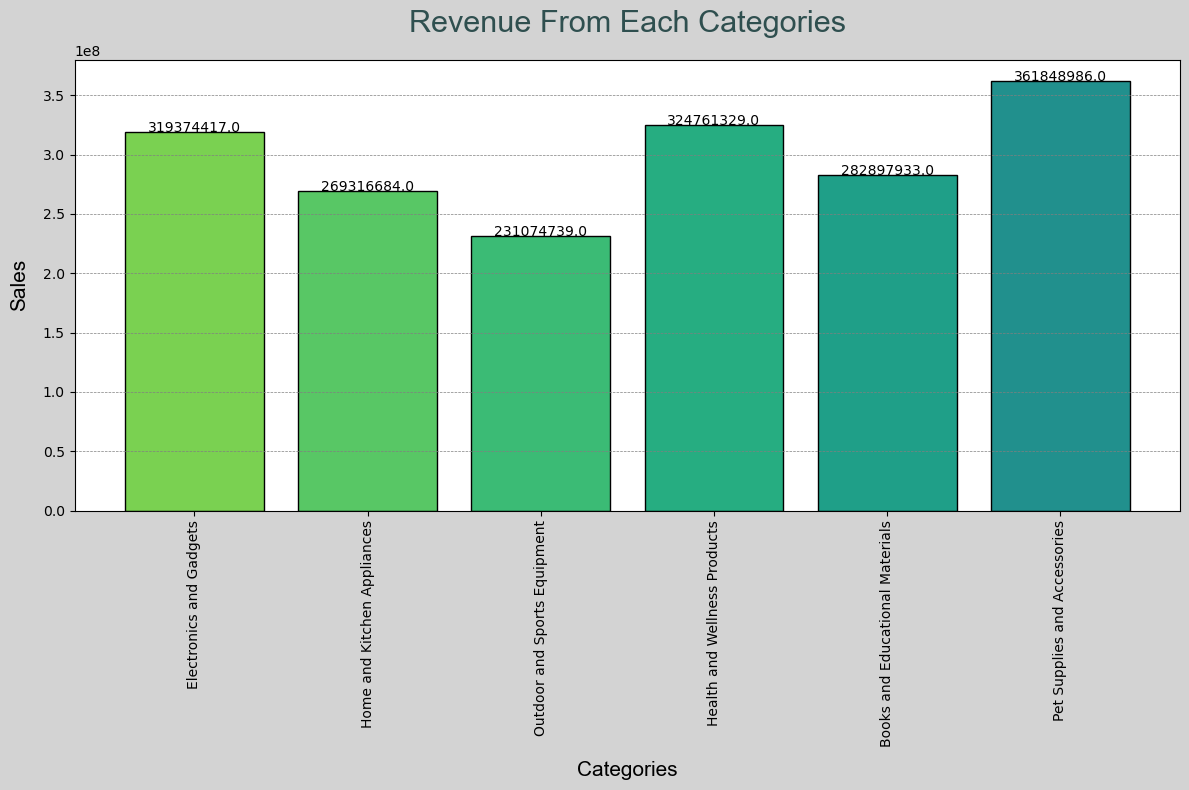

In [333]:
plt.figure(figsize=(12, 8),facecolor='lightgray')
plt.title('Revenue From Each Categories', fontdict={'family': 'Arial', 'size': 22, 'color': 'darkslategray'}, pad=20)
plt.bar(Categoryname, Totalsales, color=cmap,edgecolor='black')

plt.xlabel('Categories', fontdict={'family':'Arial','size':15,'color':'black'},labelpad=10)
plt.ylabel('Sales', fontdict={'family':'Arial','size':15,'color':'black'},labelpad=10)

for i in range(len(Categoryname)):
    plt.annotate(xy=(i, Totalsales[i]),
                 text=str(Totalsales[i]),
                 horizontalalignment='center')

plt.xticks(rotation=90)
plt.grid(axis='y',linestyle='--',color='Grey',linewidth=0.5)
plt.tight_layout()
plt.show()
